# **Mileage Prediction**

##**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Import Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

##**Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


##**Removing Missing Values**

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


##**Data Visualization**

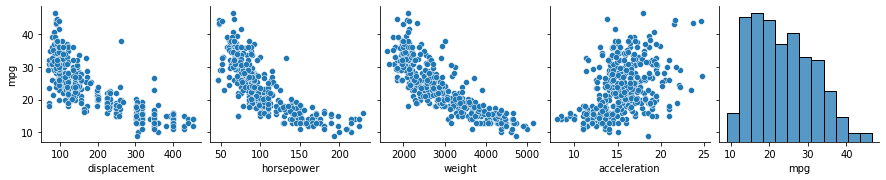

In [ ]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower' ,'weight', 'acceleration', 'mpg'], y_vars= ['mpg'])

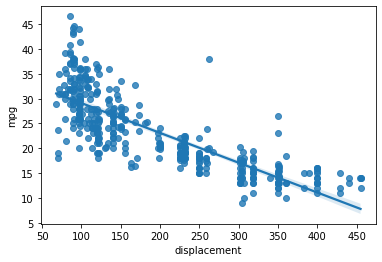

In [ ]:
sns.regplot(x = 'displacement' , y = 'mpg' , data = df)

##**Define Target Variable y and Feature X**

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
X = df[[ 'displacement', 'horsepower', 'weight', 'acceleration']]

In [ ]:
X.shape

(392, 4)

##**Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X = ss.fit_transform(X)

##**Test Train Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7 , random_state = 252529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

##**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.intercept_

23.503303263027362

In [ ]:
lr.coef_

array([-0.68196453, -2.05959958, -4.39960729, -0.14463866])

**Mileage = 23.4 - 1.05 Displacement - 1.68 Horsepower - 4.10 Weight - 0.115 Acceleration + error**

##**Predict Test Data**

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([16.30649175, 28.3068148 , 30.99294563, 31.46553828, 15.5926888 ,
       30.5105435 , 19.93732946, 31.24695756, 21.82966295, 25.99332533,
       23.6423974 , 24.35674543, 30.08916935, 11.26963474, 23.59867746,
       18.02269365, 17.86149533, 30.00655231,  9.00907838, 10.09605149,
       29.471787  , 32.314329  , 21.20651625, 29.52238728,  7.10285125,
       18.70414869, 19.92349557, 26.51154333, 31.0679543 , 30.77443598,
       32.35307679, 22.34261176, 31.51596077, 32.85203424, 29.66364166,
       31.18490396, 10.88616647, 28.51033711, 32.05726359, 31.52422652,
       27.68217922, 24.14937688, 31.24954606, 16.98797983,  9.42787757,
       10.76666067, 31.35319631, 14.36195664, 27.96270541, 29.13009366,
       27.81581736, 18.17281254, 28.2721681 , 24.56163259, 23.36809719,
        8.07866653, 19.50984229, 16.27113467, 32.08513978, 31.32900795,
        8.79083871, 31.52796776, 27.72601465, 24.50394919, 22.3015388 ,
       32.96604386,  5.34896978, 20.77193487, 26.32790284, 12.26

##**Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_error(y_test, y_pred)

3.375182558894551

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.15504118367421402

In [ ]:
r2_score(y_test, y_pred)

0.7208123697604325

##**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)

In [ ]:
X_train2 = poly.fit_transform(X_train)

In [ ]:
X_test2 = poly.fit_transform(X_test)

In [ ]:
lr.fit(X_train2, y_train)

LinearRegression()

In [ ]:
lr.intercept_

21.122622729644252

In [ ]:
lr.coef_

array([-1.91913424, -5.00570246, -2.4410389 , -0.91949667,  0.62994734,
        0.59698978, -0.22717461,  1.36823782, -0.93470223,  1.30326125])

In [ ]:
y_pred_poly = lr.predict(X_test2)

##**Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_error(y_test, y_pred_poly)

2.976501464952578

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.12873228170306922

In [ ]:
r2_score(y_test, y_pred_poly)

0.7624878307019969